<a href="https://colab.research.google.com/github/JADS-GROUP8/DM/blob/main/Data_Mining_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting California Housing Prices | Group Assignment 1 | Data Mining

## Business Understanding & Problem Statement

#### Problem Statement
The objective of this project is to predict the housing prices in different districts of California, using demographic and geographic data from the 1990 California census. This project aims to analyze various factors influencing housing prices and to develop a model to estimate the property values based on these factors.

#### Objective
The primary goal is to create a model that can predict the median house value for different areas in California. By understanding the relationships between features such as distance to major cities, income levels and the number of rooms inside of a house. The model will help us by identifying key influences of housing prices.

#### Importance and Relevance
Accurately predicting housing prices can provide several benefits:

1. For home buyers: this helps home buyers with making informed decisions, by providing insights about whether a house is fairly priced.

2. For real estate developers: this model will also help real estate developers in making strategic investments and developments.

#### Approach
During this project the following data mining techniques will be applied, based on the CRISP-DM model, to achieve our goal:


1. Data Cleaning: addressing of missing values and outliers, to ensure data quality.

2. Exploratory Data Analysis (EDA): understanding of the data, by making visualizations and statistical summaries.

3. Feature Engineering: creating new variables, such as the distance to the closest big cities, to improve the model performance.

4. Model Building: developing and comparing multiple models, for example linear regression and decision trees, to predict the housing prices.

5. Model Evaluation: using performance metrics such ... FILL THIS IN



<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/639px-CRISP-DM_Process_Diagram.png" alt="CRISP-DM Process" style="width:500px;height:500px;margin-top: 20px;">
</div>

## Possible Challenges and Limitations

When working with the California Housing Prices dataset, several potential challenges and limitations that might arise during data preparation and analysis phases are:

1. Data Quality Issues:
    - Missing Values: the dataset might have missing entries. Handling these missing values accordingly is crucial to avoid biases in the analysis.

    - Outliers: outliers in important features, for example like the Median House Value or Total Rooms could distort the model's performance. Identifying and deciding whether to keep or remove outliers is necessary to maintain data integrity.

2. Feature Engineering Complexity:
    - High Correlation: some features may be highly correlated with each other, for example Total Rooms and Total Bedrooms, which can lead to multicollinearity issues in regression models. This needs to be addressed by either removing the redundant features or using dimensionality reduction techniques.  

3. Data Imbalance:
    - The dataset may have an uneven distribution of Median House Value, with some price ranges occurring more than others. This imbalance can skew model predictions towards the more common price ranges, reducing accuracy for less common values.

4. Scalability and Generalization:
    - The dataset represents housing prices based on 1990 census, making it less generalizable to current housing prices. Although this is acceptable for this project, it is important to note that the model's predictive power might decrease when applied to recent data. NEED TO WRITE SOMETHING ABOUT HOW TO TACKLE THIS !!!!!!!!!!!!!!!!!!!!

5. Computational Complexity:
    - Performing feature engineering and advanced visualizations on the entire dataset can be computationally intensive, especially if you are using high-dimensional data or complex algorithms like a Random Forest. This may require optimizations or sampling techniques to handle efficiently.

6. Handling Geographical Information:
    - Features like Latitude and Longitude may not be straightforward to use in predictive modelling, as they represent locations rather than numerical values. Advanced techniques such as clustering based on geographical regions might be required to make effective use of the geographical data.

# Business Understanding

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import data from a CSV file
df = pd.read_csv('California_Houses.csv')
df.head()

#Rename Distance_to_LA collumn to Distance_to_LosAngeles
df.rename(columns={'Distance_to_LA':'Distance_to_LosAngeles'}, inplace=True) #For consisting naming standard

# 1) EDA

In [ ]:
# Display basic statistics
print(df.describe())

       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000  

In [ ]:
# Check for missing values
print(df.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LosAngeles      0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


There are no missing values in the data set. Therefore, we ballin

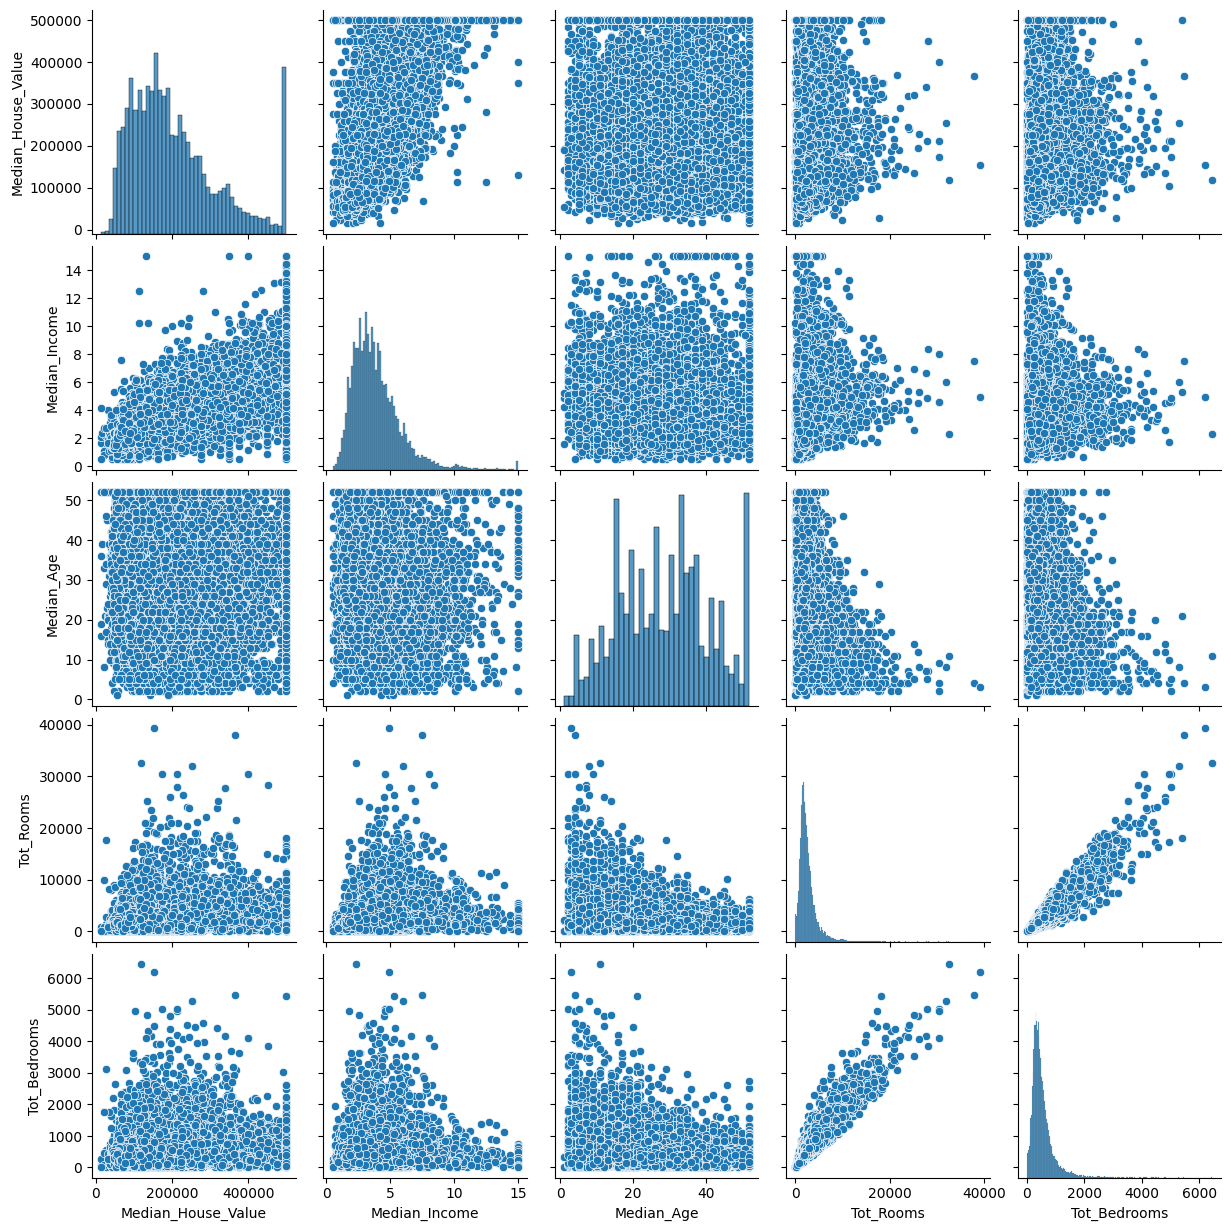

In [ ]:
# Pairplot for a subset of columns
sns.pairplot(df[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms']])
plt.show()

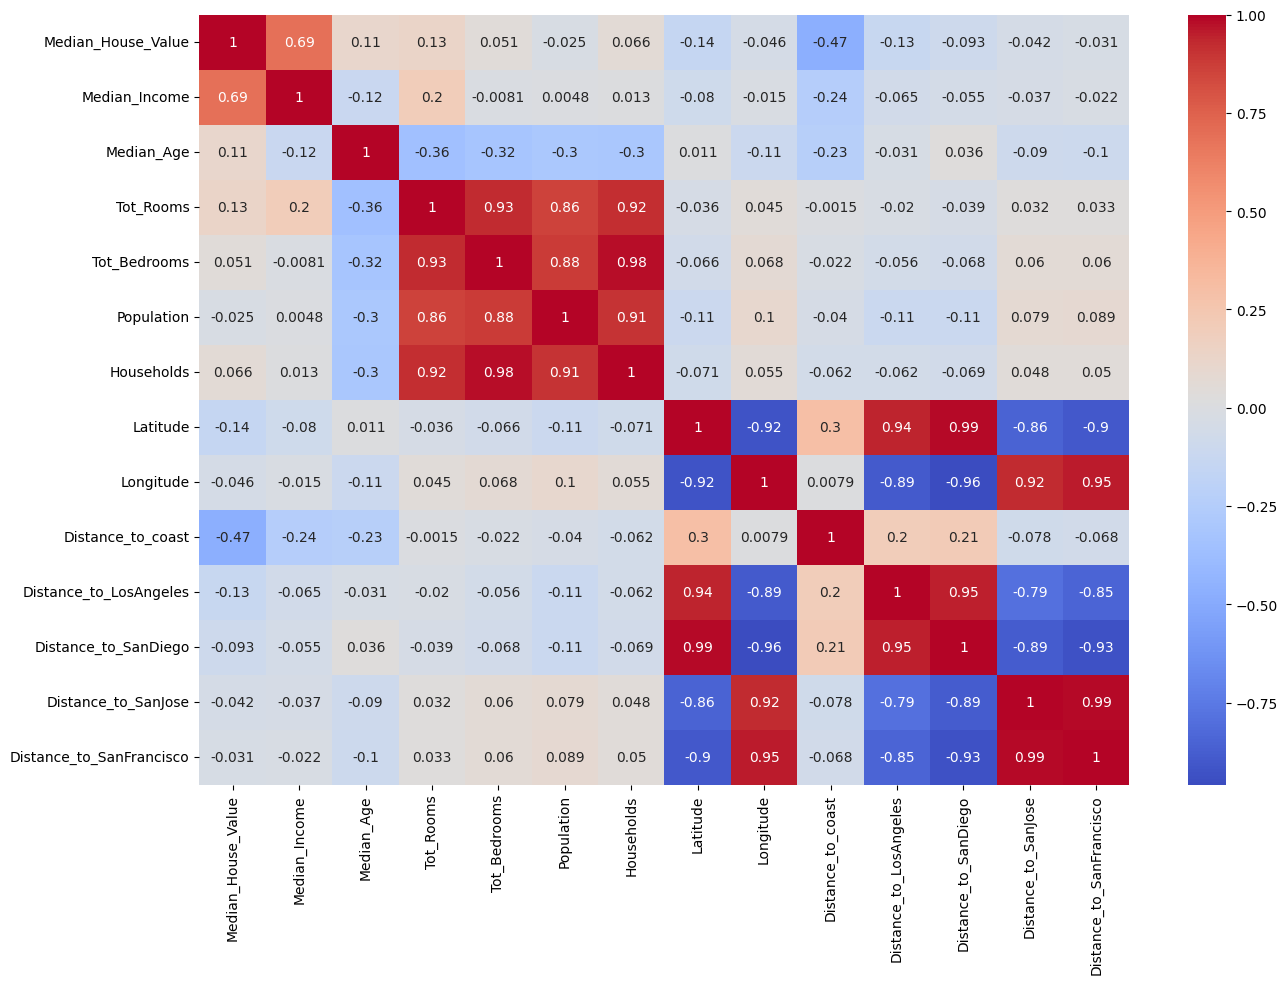

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

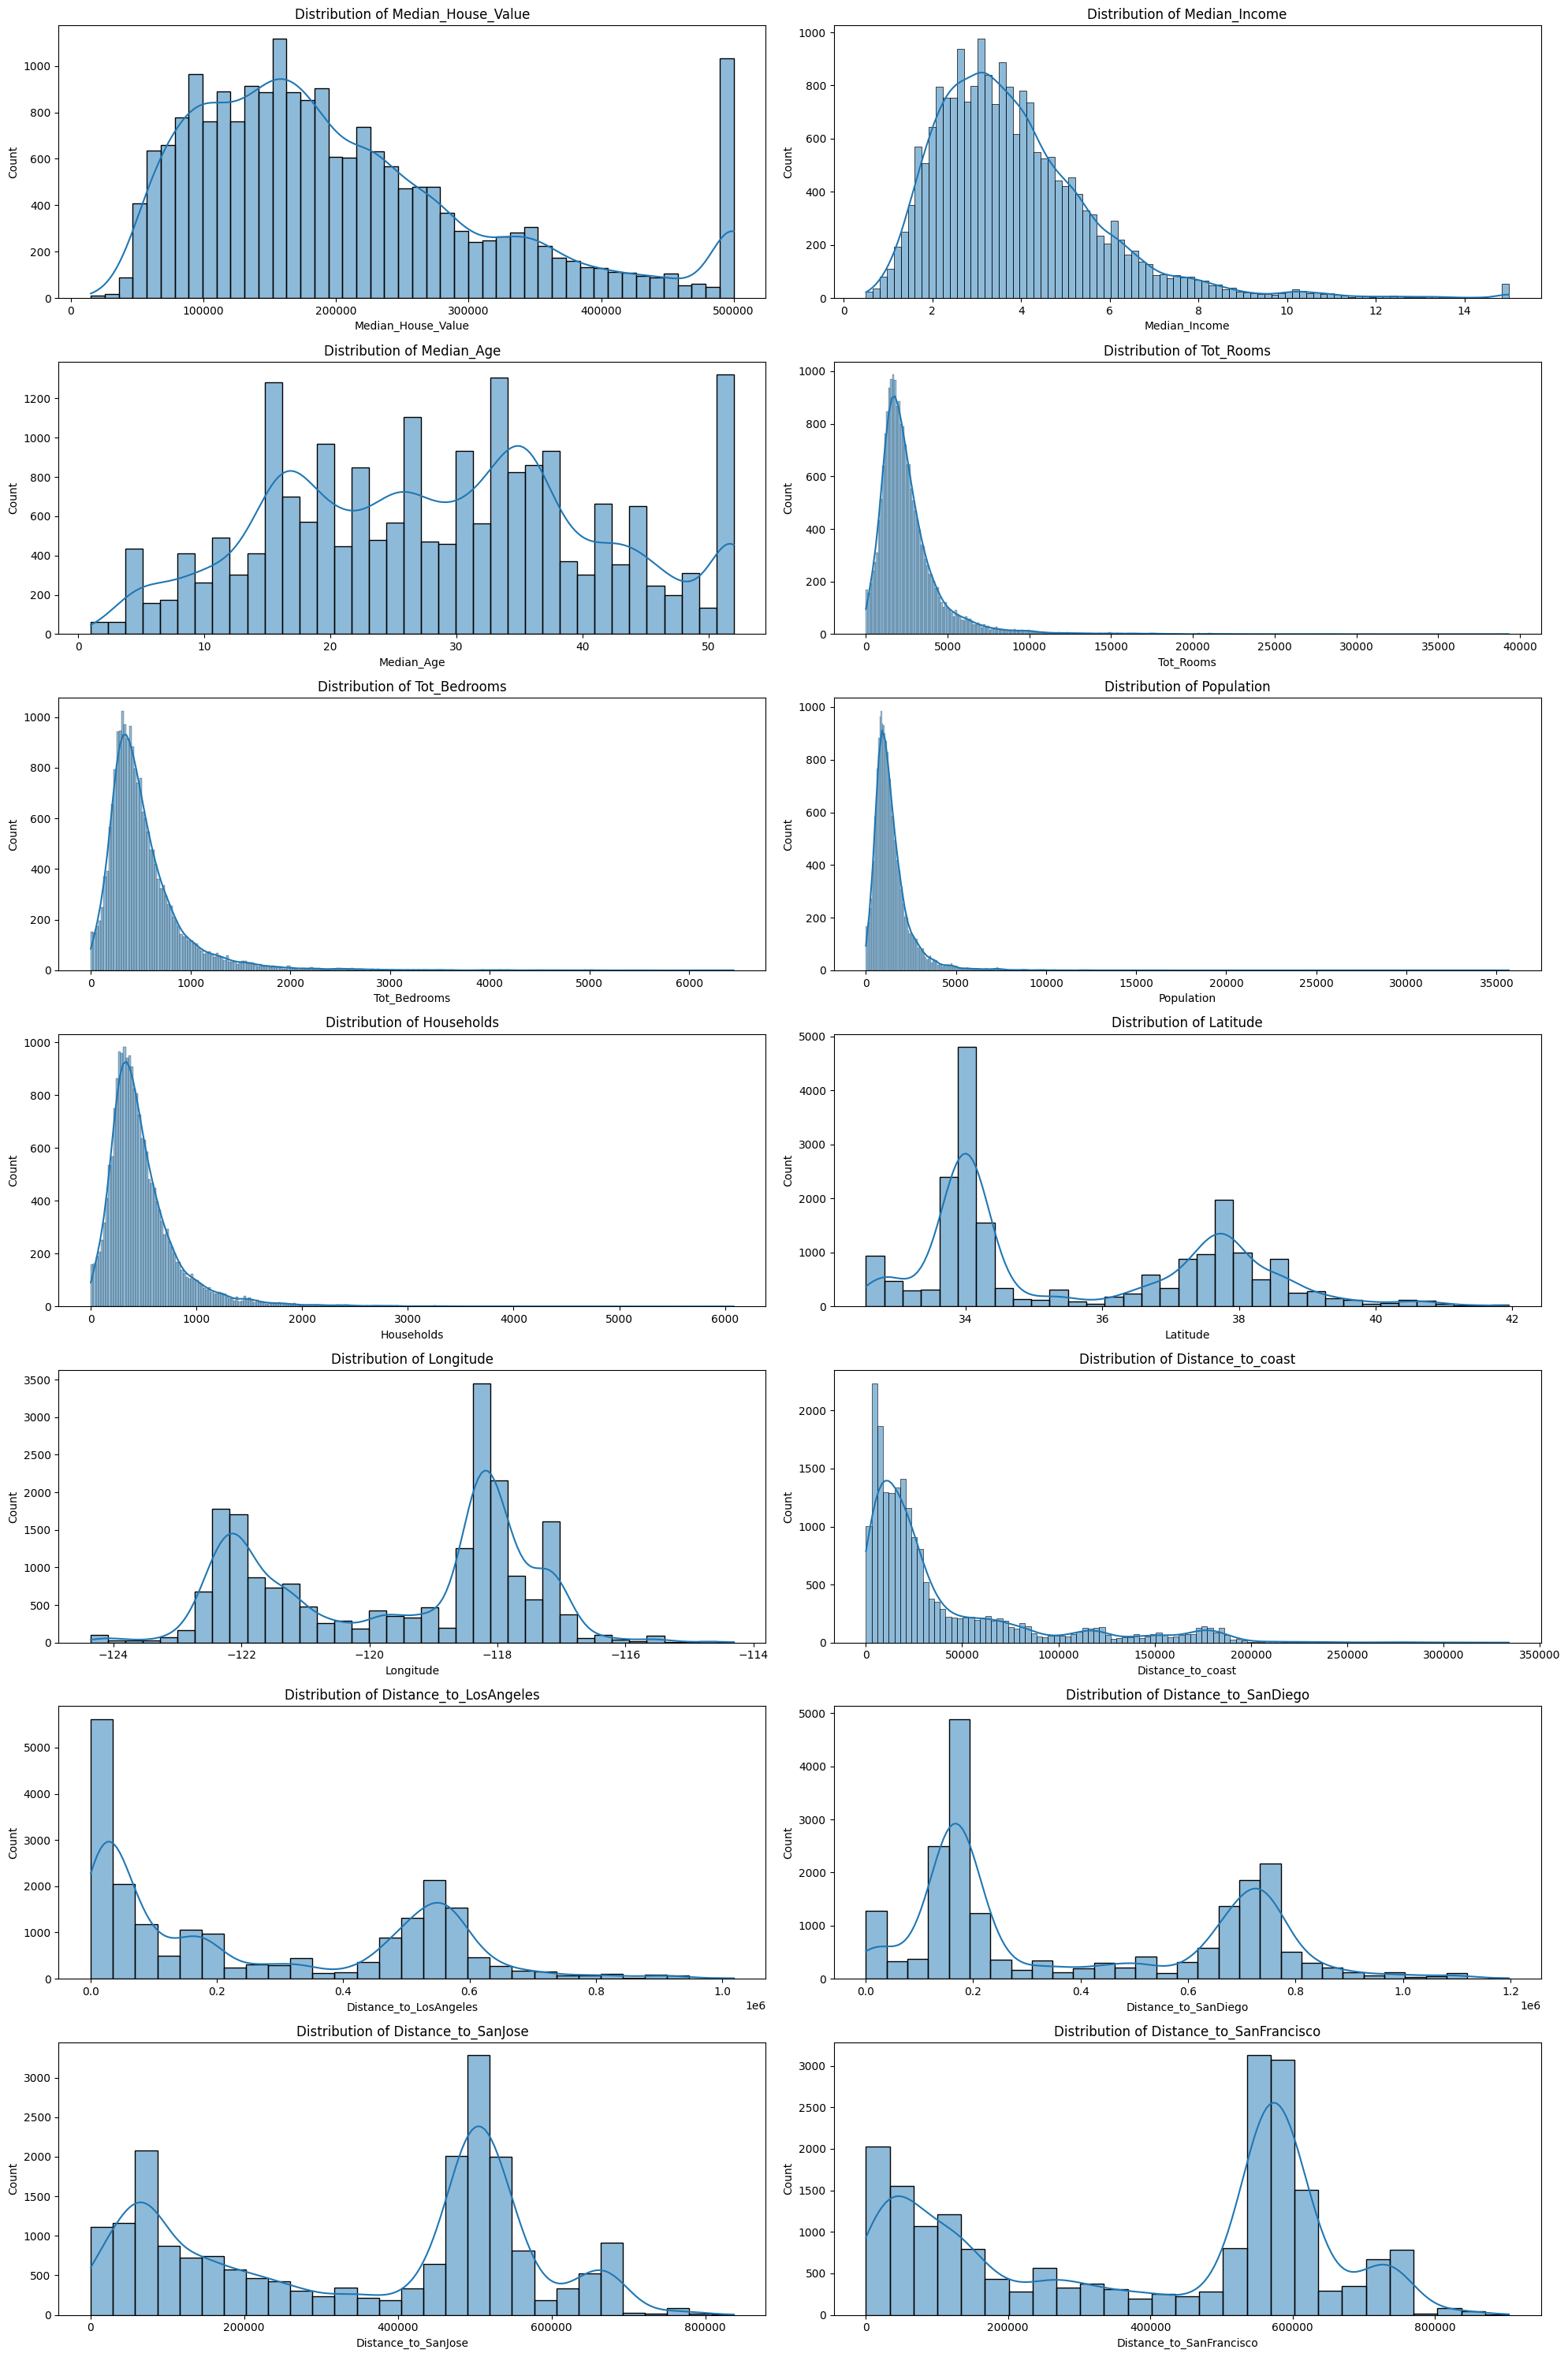

In [ ]:
# Plot density plots for all variables in a single figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Examining the plots we can detect two sperate clusters located in california as distance wise all the distribution graphs cumulated around 2 different points.

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LosAngeles,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


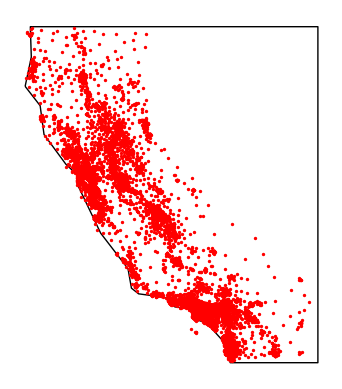

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)


world = gpd.read_file(get_path("naturalearth.land"))

# We restrict to California.
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=2)

# Remove axes completely
ax.axis('off')

plt.show()

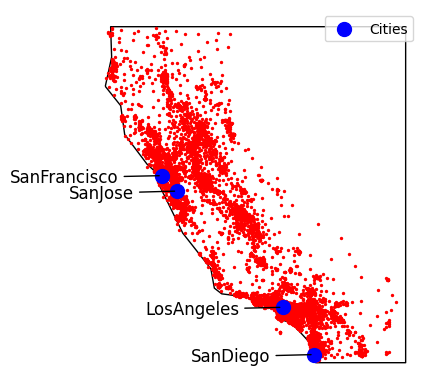

In [ ]:
# Create a DataFrame for the cities with their coordinates
cities_data = {
    'City': ['SanJose', 'SanFrancisco', 'LosAngeles', 'SanDiego'],
    'Latitude': [37.3382, 37.7749, 34.0522, 32.7157],
    'Longitude': [-121.8863, -122.4194, -118.2437, -117.1611]
}

df_cities = pd.DataFrame(cities_data)

# Convert the DataFrame to a GeoDataFrame
gdf_cities = gpd.GeoDataFrame(
    df_cities, geometry=gpd.points_from_xy(df_cities.Longitude, df_cities.Latitude), crs="EPSG:4326"
)



# Plot the cities on the map
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=2)
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.legend()
plt.show()

C:\Users\doruk\AppData\Local\Temp\ipykernel_83188\3164632962.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grid['counts'].fillna(0, inplace=True)
C:\Users\doruk\AppData\Local\Temp\ipykernel_83188\3164632962.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_centroids = grid.geometry.centroid
C:\Users\doruk\AppData\Local\Temp\ipykernel_83188\3164632962.py:56: UserWarning: No 

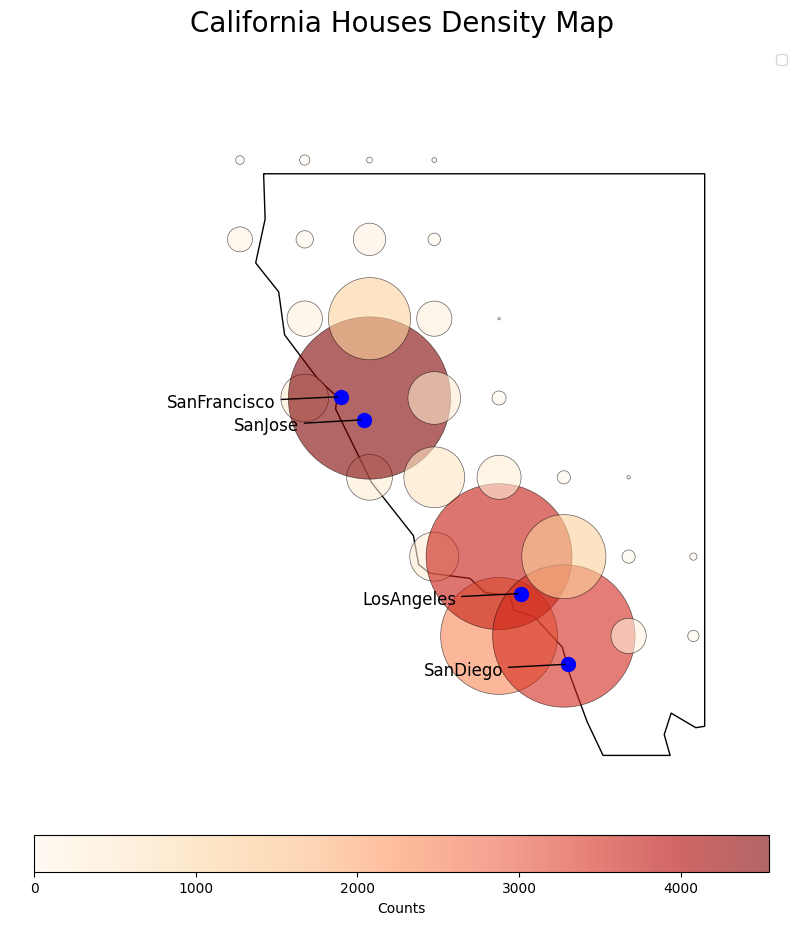

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from geopandas.datasets import get_path


# Create a grid of polygons over the area of interest
xmin, ymin, xmax, ymax = -130, 32.5, -114, 42
cell_size = 1.5
grid_cells = []
for x in np.arange(xmin, xmax + cell_size, cell_size):
    for y in np.arange(ymin, ymax + cell_size, cell_size):
        grid_cells.append(box(x, y, x + cell_size, y + cell_size))
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs="EPSG:4326")

# Perform spatial join to count points in each grid cell
joined = gpd.sjoin(gdf, grid, how='left', predicate='within')
grid['counts'] = joined.groupby('index_right').size()
grid['counts'].fillna(0, inplace=True)

# Create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map
world.clip([-130, 31, -114, 42]).plot(ax=ax, color="white", edgecolor="black") #Dimensions for california

# Plot the grid as bubbles
grid_centroids = grid.geometry.centroid
sc = ax.scatter(grid_centroids.x, grid_centroids.y, s=grid['counts']*3, c=grid['counts'], cmap='OrRd', alpha=0.6, edgecolor='k', linewidth=0.5)

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, shrink=0.5)
cbar.set_label('Counts')

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# subplot title
plt.suptitle('California Houses Density Map', fontsize=20)

# Remove empty space around the plot
plt.tight_layout()

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

In [ ]:
# # Load the GeoJSON file
# gdf_counties = gpd.read_file('gadm41_USA_2.json')

# # Filter for California counties
# gdf_california = gdf_counties[gdf_counties['NAME_1'] == 'California']

# # Merge the GeoDataFrame with the df DataFrame
# gdf_california = gdf_california.merge(df, left_on='NAME_2', right_on='County_Name')

# # Plot the merged GeoDataFrame
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# gdf_california.plot(column='Median_House_Value', ax=ax, legend=True,
#                     legend_kwds={'label': "Median House Value by County",
#                                  'orientation': "horizontal"})
# plt.title('Median House Value by County in California')
# plt.show()

In [ ]:
# Create new Closest City column for Los Angeles and San Francisco Sanjose and San Diego using distance collumnns
df['Closest_Distance'] = df[[column for column in df.columns if column.startswith('Distance_')]].min(axis=1)

In [ ]:
# Create new Closest City column for Los Angeles and San Francisco Sanjose and San Diego using distance collumnns
selected_columns = [column for column in df.columns if column.startswith('Distance_')]
selected_columns.remove('Distance_to_coast')
df['Closest_Distance'] = df[selected_columns].min(axis=1)

df['Closest_City'] = np.where(df['Distance_to_LosAngeles'] == df['Closest_Distance'], 'LosAngeles',
                     np.where(df['Distance_to_SanDiego'] == df['Closest_Distance'], 'SanDiego',
                     np.where(df['Distance_to_SanJose'] == df['Closest_Distance'], 'SanJose', 'SanFrancisco')))

# Display the first few rows to verify the new column
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LosAngeles,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Closest_Distance,Closest_City
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,21250.213767,SanFrancisco
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,20880.600400,SanFrancisco
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,18811.487450,SanFrancisco
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,18031.047568,SanFrancisco
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,18031.047568,SanFrancisco


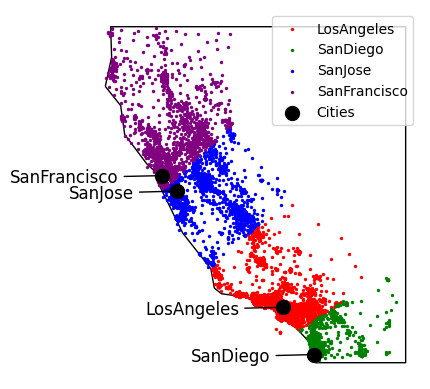

In [ ]:
# Map the points into a map, keeping the city points and using the Closest_City column to color the points

# Define colors for each city
colors = {'LosAngeles': 'red', 'SanDiego': 'green', 'SanJose': 'blue', 'SanFrancisco': 'purple'}

# Create a GeoDataFrame for the points with the closest city
gdf['Closest_City'] = df['Closest_City']

# Plot the world map restricted to California
ax = world.clip([-130, 32.5, -114, 42]).plot(color="white", edgecolor="black")

# Plot the points colored by the closest city
for city, color in colors.items():
    gdf[gdf['Closest_City'] == city].plot(ax=ax, color=color, markersize=2, label=city)

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="black", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

In [ ]:
columns_to_plot = [col for col in df.columns if col not in ['Longitude', 'Latitude',
                                                            'Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                             'Closest_Distance', 'Closest_City']]

columns_to_plot

['Median_House_Value',
 'Median_Income',
 'Median_Age',
 'Tot_Rooms',
 'Tot_Bedrooms',
 'Population',
 'Households',
 'Closest_Distance',
 'Closest_City']

In [ ]:
columns_to_plot = [col for col in df.columns if col not in ['Longitude', 'Latitude', 'Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco', 'Distance_to_coast']]

# Create histograms with density plots for each column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.histplot(df, x=col, hue='Closest_City', element='step', stat='density', common_norm=False, palette=colors, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Closest City')

plt.tight_layout()
plt.show()

AttributeError: 'str' object has no attribute 'con'

In [ ]:
# Select columns excluding distance columns
columns_to_plot = [col for col in df.columns if not col.startswith('Distance_') and col not in ['Closest_Distance', 'Closest_City']]

# Create a pairs plot
sns.pairplot(df[columns_to_plot + ['Closest_City']], hue='Closest_City', palette=colors)
plt.show()

KeyboardInterrupt: 

# 2) Regression Models

## Linear Regression:

In [ ]:
# Select the features and target variable
X = df[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude']]
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 4918556441.477829
Coefficients: [ 77194.69946558  14905.90644754 -17805.41850057  48712.34334124
 -43766.49115918  17654.50065911 -90698.84880311 -85503.21815336]
Intercept: 207194.69373788778


In [ ]:
# Summary of the linear regression model
print("Linear Regression Model Summary")
print("--------------------------------")
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

# Calculate and print R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Linear Regression Model Summary
--------------------------------
Intercept: 207194.69373788778
Coefficients:
  Median_Income: 77194.69946557943
  Median_Age: 14905.90644753964
  Tot_Rooms: -17805.418500572312
  Tot_Bedrooms: 48712.34334124335
  Population: -43766.49115918065
  Households: 17654.500659113775
  Latitude: -90698.84880310626
  Longitude: -85503.21815336416

Mean Squared Error: 4918556441.477829
R-squared: 0.6246548578993616


In [ ]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     3669.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:55:51   Log-Likelihood:            -2.0749e+05
No. Observations:               16512   AIC:                         4.150e+05
Df Residuals:                   16503   BIC:                         4.151e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    539.936    383.739      0.0

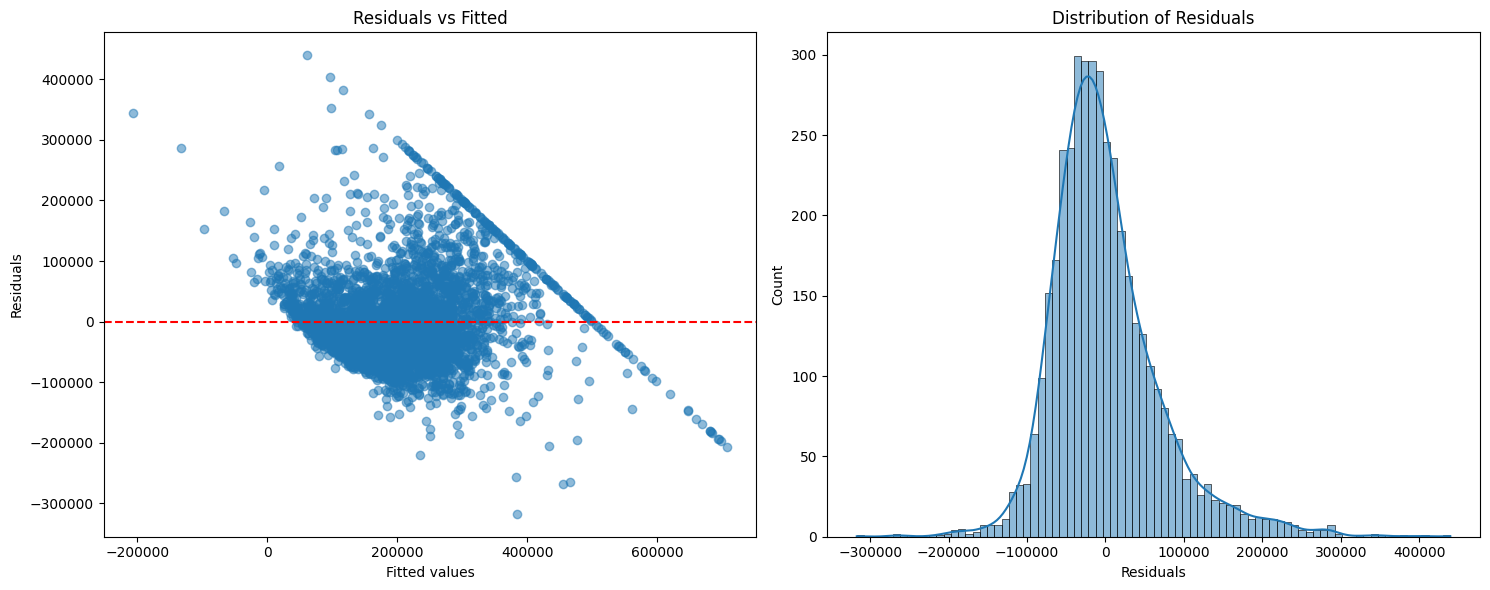

R-squared: 0.6246548578993616


In [ ]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(15, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Calculate and print R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f'R-squared: {r_squared}')



In [ ]:
# from statsmodels.graphics.regressionplots import plot_leverage_resid2
# from statsmodels.graphics.regressionplots import influence_plot

# # Create leverage vs. residuals plot with influence lines
# fig, ax = plt.subplots(figsize=(12, 8))
# plot_leverage_resid2(model_sm, ax=ax)

# # Add Cook's distance lines
# influence_plot(model_sm, criterion="cooks", ax=ax, alpha=0.05, size=2)

# plt.show()